# Project 1: Data Cleaning, Visualization, and Mining

In [1]:
# Add all of your import statements here
import numpy as np
import pandas as pd
import missingno as msno
import statsmodels.api as sm
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, normalize
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Setup, Cleaning, Organizing, and Exploring the Data

Let's now try to read in the data, clean up the data by getting rid of NAs, and explore the data. Feel free to use any commands to do these parts. As always, report your steps in the writeup.

In [2]:
df = pd.read_csv('acs2015_county_data.csv')
df

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
5,1011,Alabama,Bullock,10678,5660,5018,4.4,22.2,70.7,1.2,...,5.0,1.7,2.8,27.5,3865,79.5,15.1,5.4,0.0,18.0
6,1013,Alabama,Butler,20354,9502,10852,1.2,53.3,43.8,0.1,...,0.8,0.6,1.7,24.6,7813,77.4,16.2,6.2,0.2,10.9
7,1015,Alabama,Calhoun,116648,56274,60374,3.5,73.0,20.3,0.2,...,1.2,1.2,2.7,24.1,47401,74.1,20.8,5.0,0.1,12.3
8,1017,Alabama,Chambers,34079,16258,17821,0.4,57.3,40.3,0.2,...,0.3,0.4,2.1,25.1,13689,85.1,12.1,2.8,0.0,8.9
9,1019,Alabama,Cherokee,26008,12975,13033,1.5,91.7,4.8,0.6,...,0.6,0.7,2.5,27.4,10155,73.1,18.5,7.9,0.5,7.9


In [3]:
df.describe()

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


In [4]:
df = df.dropna(axis=0)
total_pop = df["TotalPop"]
men = df["Men"]
women = df["Women"]
hispanic = df["Hispanic"]
white = df["White"]
black = df["Black"]
native = df["Native"]
asian = df["Asian"]
pacific = df["Pacific"]
citizen = df["Citizen"]
income = df["Income"]
income_err = df["IncomeErr"]
income_per_cap = df["IncomePerCap"]
income_per_cap_err = df["IncomePerCapErr"]
poverty = df["Poverty"]
child_poverty = df["ChildPoverty"]
professional = df["Professional"]
service = df["Service"]
office = df["Office"]
construction = df["Construction"]
production = df["Production"]
drive = df["Drive"]
carpool = df["Carpool"]
transit = df["Transit"]
walk = df["Walk"]
other_transp = df["OtherTransp"]
work_at_home = df["WorkAtHome"]
mean_commute = df["MeanCommute"]
employed = df["Employed"]
private_work = df["PrivateWork"]
public_word = df["PublicWork"]
self_employed = df["SelfEmployed"]
family_work = df["FamilyWork"]
unemployment = df["Unemployment"]

# Visualizing the Data

This is the most fun part of the project! Now you can go ahead and create your graphs (appropriately labeled of course), models, and other visualizations. Make sure you demonstrate your ability to create rich graphs by creating various different types of graphs, both for numerical as well as categorical data. 

Here are some types of graphs that you will want to create for this project. Remember to browse the online documentation for many Python graphing and visualization packages such as plotly, seaborn, and matplotlib if you need to borrow any code or get some help!
1. Creating multiple graphs that plot important financial indicators (y-axis) like the median annual income, per capita income, poverty rate, childhood poverty rate, and/or unemployment rate present in a particular county AGAINST several features in the dataset (x-axis) that might affect these factors, such as the total population of the county; the racial demographics of the county; or the occupations of different workers (professionals, service workers, construction, manufacturing).   

2. Using plotly as a graphing library to visualize these financial indicators in the 2015 American Community Survey data on a geographical map of the United States on a state-wide or county-based level (similar to what we did in class when we visualized global average temperatures for different countries on a global map). 

# Linear Regression

Make sure you also demonstrate your ability to create regressions on your data. In this part of the project, you will pick 3 financial indicators (like the median annual income, per capita income, poverty rate, childhood poverty rate, and/or unemployment rate) in the dataset. You will then train 3 linear regression models in scikit-learn that attempt to predict these 3 financial indicators of a county from the rest of the data collected in the dataset. You should analyze the accuracy of your linear regression model and report important predictors or features in your dataset that had the highest effect size on these 3 financial indicators (as discovered by your regression model). 

Optional: You can try adding regularization to see if you can get better results. 

In [16]:
def linear_reg(X, y, norm=None):
    if norm:
        X = normalize(X, norm)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)    
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    y_train_pred = linear.predict(X_train)
    y_test_pred = linear.predict(X_test)
    #print("Train r2 score:", r2_score(y_train_pred, y_train))
    #print("Test r2 score:", r2_score(y_test_pred, y_test))
    return r2_score(y_test_pred, y_test)
    
X = df.drop(['IncomePerCap', 'CensusId', 'State', 'County'], axis=1)
print("Income Per Capita Linear Regression Model")
linear_reg(X, income_per_cap)

X = df.drop(['IncomePerCap', 'CensusId', 'State', 'County'], axis=1)
print("Income Per Capita Linear Regression Model (l1 Normalized)")
linear_reg(X, income_per_cap, 'l1')

print()

X = df.drop(['Unemployment', 'CensusId', 'State', 'County'], axis=1)
print("Unemployment Linear Regression Model")
linear_reg(X, unemployment)

X = df.drop(['Unemployment', 'CensusId', 'State', 'County'], axis=1)
print("Unemployment Linear Regression Model (l1 Normalized)")
linear_reg(X, unemployment, 'l1')

print()

X = df.drop(['Poverty', 'CensusId', 'State', 'County'], axis=1)
print("Poverty Linear Regression Model")
linear_reg(X, poverty)

X = df.drop(['Poverty', 'CensusId', 'State', 'County'], axis=1)
print("Poverty Linear Regression Model (l1 Normalized)")
linear_reg(X, poverty, 'l1')

Income Per Capita Linear Regression Model
Income Per Capita Linear Regression Model (l1 Normalized)

Unemployment Linear Regression Model
Unemployment Linear Regression Model (l1 Normalized)

Poverty Linear Regression Model
Poverty Linear Regression Model (l1 Normalized)


0.82668430768217727

In [21]:
def importantFeat(X, y, norm=None):
    diff = {}
    if norm:
        X = normalize(X, norm)
    standard = linear_reg(X, y)
    for col in X.columns:
        if col != 'Income':
            diff[standard - linear_reg(X.drop(col, axis=1), y)] = col
    max_diff_key = max(diff, key=float)
    return diff[max_diff_key], max_diff_key
num = 10

for _ in range(num):
    print('IncomePerCap important feat', importantFeat(df.drop(['IncomePerCap', 'CensusId', 'State', 'County'], axis=1), income_per_cap))

for _ in range(num):
    print('Unemployment important feat', importantFeat(df.drop(['Unemployment', 'CensusId', 'State', 'County'], axis=1), unemployment))

for _ in range(num):
    print('Poverty important feat', importantFeat(df.drop(['Poverty', 'CensusId', 'State', 'County'], axis=1), poverty))
        

IncomePerCap important feat ('Income', 0.14180402675614323)
IncomePerCap important feat ('Income', 0.1098727069989659)
IncomePerCap important feat ('Income', 0.1356246976181249)
IncomePerCap important feat ('Income', 0.1245621686572459)
IncomePerCap important feat ('Income', 0.068468252112948047)
IncomePerCap important feat ('Income', 0.085370911123127891)
IncomePerCap important feat ('Income', 0.079349479445365523)
IncomePerCap important feat ('Income', 0.1505158325228384)
IncomePerCap important feat ('Income', 0.14494262532993862)
IncomePerCap important feat ('Income', 0.051564464386134712)
Unemployment important feat ('MeanCommute', 0.16357115521388399)
Unemployment important feat ('OtherTransp', 0.19662248092639734)
Unemployment important feat ('MeanCommute', 0.13168105863457913)
Unemployment important feat ('Employed', 0.1359579504096029)
Unemployment important feat ('MeanCommute', 0.1269184182015245)
Unemployment important feat ('Black', 0.071601855432855466)
Unemployment importa

In [23]:
def importantFeat(X, y, norm=None):
    diff = {}
    if norm:
        X = normalize(X, norm)
    standard = linear_reg(X, y)
    for col in X.columns:
        if col != 'Income':
            diff[standard - linear_reg(X.drop(col, axis=1), y)] = col
    max_diff_key = max(diff, key=float)
    return diff[max_diff_key], max_diff_key
num = 10

for _ in range(num):
    print('IncomePerCap important feat', importantFeat(df.drop(['IncomePerCap', 'CensusId', 'State', 'County'], axis=1), income_per_cap))

IncomePerCap important feat ('Construction', 0.045643839275645748)
IncomePerCap important feat ('Carpool', 0.066046361766406214)
IncomePerCap important feat ('IncomePerCapErr', 0.046830034251266861)
IncomePerCap important feat ('IncomeErr', 0.036770212148578119)
IncomePerCap important feat ('Transit', 0.02097436182486534)
IncomePerCap important feat ('Employed', 0.069083901030457362)
IncomePerCap important feat ('Employed', 0.026047874597640019)
IncomePerCap important feat ('SelfEmployed', 0.03994270082269713)
IncomePerCap important feat ('Native', 0.015960872115450497)
IncomePerCap important feat ('ChildPoverty', 0.048065523846969938)


The MSE for the model wage~points is: 62.6347410112


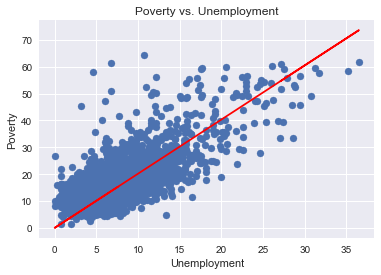

In [145]:
plt.figure()
plt.title("Poverty vs. Unemployment")
plt.xlabel("Unemployment")
plt.ylabel("Poverty")

plt.scatter(unemployment, poverty)
myOLS_points = sm.OLS(poverty, unemployment).fit()
plt.plot(unemployment, myOLS_points.predict(unemployment), color='red')

rows = int(df.shape[0] * 0.75)
poverty_train = poverty[0:rows]
poverty_valid = poverty[rows:]
unemployment_train = unemployment[0:rows]
unemployment_valid = unemployment[rows:]

myOLS = sm.OLS(poverty_train, unemployment_train).fit()
poverty_hat = myOLS.predict(unemployment_valid)
mse = np.linalg.norm(poverty_valid - poverty_hat)**2 / len(poverty_valid)

print("The MSE for the model wage~points is:", mse)